# Article figures: simulated data

In [1]:
# General latex settings
import os
import odl
import misc
import scipy.io
import brewer2mpl
import matplotlib
import numpy as np
from PIL import Image  
import PIL
import misc_dataset as miscD
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
from odl.contrib.fom.supervised import psnr
from odl.contrib.fom.supervised import ssim
from matplotlib.ticker import FormatStrFormatter
from matplotlib.font_manager import FontProperties
from odl.contrib.fom.supervised import haarpsi as hpsi

In [2]:
bmap = brewer2mpl.get_map('Paired', 'Qualitative', 5)
colors = bmap.mpl_colors

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

# set font
fsize = 11
font = {'family': 'serif', 'size': fsize}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=fsize)  # fontsize of x and y labels
matplotlib.rc('xtick', labelsize=fsize)  # fontsize of xtick labels
matplotlib.rc('ytick', labelsize=fsize)  # fontsize of ytick labels
matplotlib.rc('legend', fontsize=fsize)  # legend fontsize

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 14,
        }

# colormaps
colormaps = {'E0': 'Reds', 'E1': 'Greens', 'E2': 'Blues'}

# lines and colors
lwidth = 2
lstyle = '-'
bmap = brewer2mpl.get_map('Set2', 'Qualitative', 5)
colors = bmap.mpl_colors
bmap = brewer2mpl.get_map('Set2', 'Qualitative', 3)
point_color = bmap.mpl_colors
color_set = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# markers
marker = ('o', 's')
markers = ('*', 'o', 's', '>', 'o', 's', '>')
msize = 8

In [3]:
# %% Folders
dataset = 'geometric'

folder_data = './data/{}'.format(dataset)
folder_images = './{}_images'.format(dataset)
if not os.path.exists(folder_images):
    os.makedirs(folder_images)

variables = {}

with open('{}/parameters.txt'.format(folder_data)) as data_file:
    for line in data_file:
        name, value = line.split(" ")
        variables[name] = float(value)

dom_width = variables["dom_width"]
vmax = {'E0': variables['vmaxE0'],
        'E1': variables['vmaxE1'],
        'E2': variables['vmaxE2']}
vmax_sinfo = variables['vmax_sinfo']

def normalize(x):
    z = (x-np.min(x))/(np.max(x)-np.min(x))
    return z

# %% Parameters
m = (512, 512)
n = 512

# Best values for fbs

In [4]:
# this values have to be checked after running experiments

optimal_alphas = {'E0': {'TV': 1e-5, 'dTV': 1e-5 },
                  'E1': {'TV': 1e-5, 'dTV': 1e-5 },
                  'E2': {'TV': 1e-5, 'dTV': 1e-5 }}

optimal_labels = {'E0': {'TV': r'1\times 10^{-5}', 'dTV': r'1\times 10^{-5}' },
                  'E1': {'TV': r'1\times 10^{-5}', 'dTV': r'1\times 10^{-5}' },
                  'E2': {'TV': r'1\times 10^{-5}', 'dTV': r'1\times 10^{-5}' }}


# Figure 1: TV vs dTV

In [5]:
energy = 'E0'

name_gt = '{}/gt_{}x{}_selected_energies.npy'.format(folder_data, m[0], m[1])
all_gt = np.load(name_gt).item()
gt = all_gt[energy]
sinfo = miscD.geometric_phantom_sinfo(n, dom_width)


In [8]:
# Spaces and operators
U = odl.uniform_discr([-dom_width/2, -dom_width/2], [dom_width/2, dom_width/2], (m[0], m[1]))

groundtruth = U.element(gt)
sinfo = U.element(sinfo)

x = groundtruth

G = odl.Gradient(U)

eta = 1e-2
D = misc.dTV(U, sinfo, eta)

f = odl.PointwiseNorm(G.range)
g = odl.PointwiseNorm(D.range)

TV = f(G(x))
dTV = g(D(x))

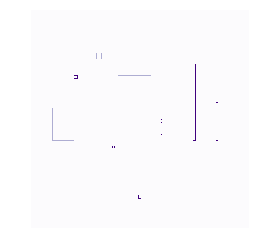

In [9]:
# Save figures
cmap = 'Purples'
vmax_local = 1000

plt.clf()
plt.imshow(groundtruth, cmap=colormaps[energy], vmax=vmax[energy])
plt.axis('off')
# plt.savefig('{}/TVvsdTV_groundtruth_{}.pdf'.format(folder_images, dataset),
#             format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0)

plt.imsave('{}/TVvsdTV_groundtruth_{}'.format(folder_images, dataset), groundtruth, cmap=colormaps[energy], vmax=vmax[energy])


plt.clf()
plt.imshow(sinfo, cmap='bone', vmax=3)
plt.axis('off')
# plt.savefig('{}/TVvsdTV_sinfo_{}.pdf'.format(folder_images, dataset),
#             format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0)

plt.imsave('{}/TVvsdTV_sinfo_{}'.format(folder_images, dataset), sinfo, cmap='bone', vmax=vmax_sinfo)


plt.clf()
plt.imshow(TV, vmax=vmax_local, cmap=cmap)
plt.axis('off')
# plt.savefig('{}/TVvsdTV_TV_{}.pdf'.format(folder_images, dataset),
#             format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0)

plt.imsave('{}/TVvsdTV_TV_{}'.format(folder_images, dataset), TV, cmap=cmap, vmax=vmax_local)


plt.clf()
plt.imshow(dTV, vmax=vmax_local, cmap=cmap)
plt.axis('off')

plt.imsave('{}/TVvsdTV_dTV_{}'.format(folder_images, dataset), dTV, cmap=cmap, vmax=vmax_local)


# GEOMETRIC PHANTOM

In [10]:
# Load all parameters for GEOMETRIC PHANTOM
dataset = 'geometric'
groundtruth_name = 'geometric_data'

folder_data = './data/{}'.format(dataset)
folder_images = './{}_images'.format(dataset)
if not os.path.exists(folder_images):
    os.makedirs(folder_images)
       
variables = {}

with open('{}/parameters.txt'.format(folder_data)) as data_file:
    for line in data_file:
        name, value = line.split(" ")
        variables[name] = float(value)

vmax = {'E0': variables['vmaxE0'],
        'E1': variables['vmaxE1'],
        'E2': variables['vmaxE2']}
vmax_sinfo = variables["vmax_sinfo"]
src_radius = variables["src_radius"]
det_radius = variables["det_radius"]
dom_width = variables['dom_width']
a = variables['scale_data']
a_str = np.str(a).replace('.', '_')

bins = np.arange(45, 115+1, 1)
nbins = len(bins)-1
bins_list = list(bins)
view_energies = [bins_list.index(np.int(variables['E0'])),
                 bins_list.index(np.int(variables['E1'])),
                 bins_list.index(np.int(variables['E2']))]

s_views = [np.int(variables['E0']), np.int(variables['E1']),
           np.int(variables['E2'])]

I0_add = 1e3

mat1 = scipy.io.loadmat('{}/SpectralInfo{}.mat'.format(folder_data, n))
s = mat1['s'] * I0_add     # Spectrum, initial intensity per energy
Vl = mat1['Vl']            # (70x4)
Vltmp_4 = mat1['Vltmp_v']

Em = np.zeros((nbins, 1))  # array for mean energy in bins
sb = np.zeros((nbins, 1))  # array for number of photons in each bin

for k in range(0, nbins):
    Ii = bins[k]        # intervals of energy
    sk = s[Ii-1]
    Em[k] = Ii * sk/np.sum(sk)
    sb[k] = np.sum(sk)

Ut = miscD.geometric_material(n, dom_width)
Ut_up = miscD.geometric_material(n, dom_width)
Vltmp = Vltmp_4[:, :3]

In [11]:
# Define sizes for data and reconstructions
m = (512, 512)
sub_m = 512
n = 512

nangles = 720
nd = 552

sub_nangles = 90
sub_ndet = 552
ndat = (sub_nangles, sub_ndet)

sub_step1 = np.int(nd/sub_ndet)
sub_step2 = np.int(nangles/sub_nangles)

subfolder = 'd{}x{}_gt{}_u{}'.format(ndat[0], ndat[1], m[0], m[0])
folder_npy = ('./results_npy/{}/{}/npy'.format(groundtruth_name, subfolder))

fig_folder = ('{}/figures'.format(folder_npy))
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)
    
energies = ['E0', 'E1', 'E2']    
gt = {}
name_gt = '{}/gt_{}x{}_selected_energies.npy'.format(folder_data, m[0], m[1])
all_gt = np.load(name_gt).item()
for energy in energies:
    gt[energy] = all_gt[energy]

## Figure 9: Materials distribution

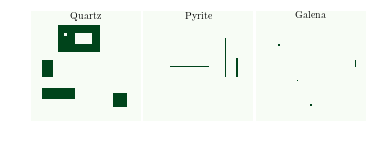

In [12]:
cmap = 'Greens'
materials = ['Quartz', 'Pyrite', 'Galena']

sinfo_sino_max = 3

Nc = Ut_up.shape[2]
fig, axs = plt.subplots(1, Nc)
gs = gridspec.GridSpec(1, Nc)
gs.update(wspace=0.025, hspace=0.05)  # set the spacing between axes.

images = []
for j in range(0, Nc):
    gt = Ut_up[:, :, j]
    axs[j] = plt.subplot(gs[j])
    images.append(axs[j].imshow(gt, cmap=cmap))
    axs[j].label_outer()
    axs[j].set_axis_off()
    axs[j].text(0.5, 0.93, r'{}'.format(materials[j]), size=10, ha='center', transform=axs[j].transAxes)

plt.show()    
fig.savefig('{}/{}_decomposition.pdf'.format(folder_images, dataset),
            format='pdf', dpi=1000,
            bbox_inches='tight', pad_inches=0.05)

## Figure 10b: Spectral curves 

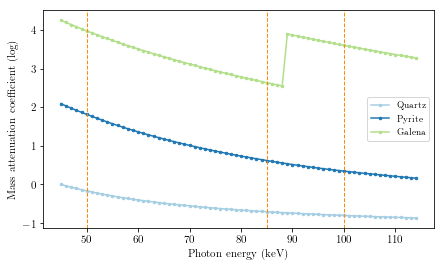

In [13]:
fontP = FontProperties()
fontP.set_size('small')

bins = np.arange(45, 115+1, 1)
bins_list = list(bins)

bmap = brewer2mpl.get_map('Paired', 'Qualitative', 5)
colors = bmap.mpl_colors

# Load main parameters
variables = {}
with open('{}/parameters.txt'.format(folder_data)) as data_file:
    for line in data_file:
        name, value = line.split(" ")
        variables[name] = float(value)

view_energies = [bins_list.index(np.int(variables['E0'])),
                 bins_list.index(np.int(variables['E1'])),
                 bins_list.index(np.int(variables['E2']))]

s_views = [np.int(variables['E0']), np.int(variables['E1']),
           np.int(variables['E2'])]

fig = plt.figure(figsize=(7, 4))
ax = plt.gca()
for i in range(0, len(materials)):
    plt.plot(np.arange(45, 115), np.log(Vltmp[:, i]), label=materials[i],
             marker='.', markersize=5, color=colors[i])

plt.legend(prop=fontP)
plt.xlabel('Photon energy (keV)')
plt.ylabel('Mass attenuation coefficient (log)')

plt.axvline(x=s_views[0], color='darkorange',
            linestyle='--', linewidth=1)
plt.axvline(x=s_views[1], color='darkorange',
            linestyle='--', linewidth=1)
plt.axvline(x=s_views[2], color='darkorange',
            linestyle='--', linewidth=1)

plt.savefig('{}/curves_material.pdf'.format(folder_images), format='pdf',
            dpi=1000, bbox_inches='tight', pad_inches=0.05)

## Figure 10a: Spectrum

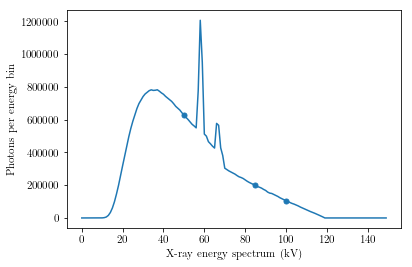

In [14]:
s_views = [np.int(variables['E0']), np.int(variables['E1']),
           np.int(variables['E2'])]
markers_on = s_views
mat1 = scipy.io.loadmat('{}/SpectralInfo512.mat'.format(folder_data))
s = mat1['s'] * I0_add  # Spectrum, initial intensity per energy

plt.plot(s, color=colors[1], marker='.', markevery=markers_on,
         markeredgecolor=colors[1], linewidth=1.5, markersize=10)

ax = plt.gca()

plt.xlabel('X-ray energy spectrum (kV)')
plt.ylabel('Photons per energy bin')

plt.savefig('{}/energy_spectrum.pdf'.format(folder_images), format='pdf',
            dpi=1000, bbox_inches='tight', pad_inches=0.05)

# Sinograms

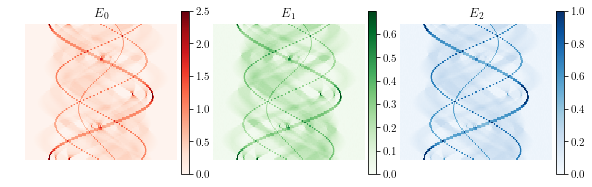

In [15]:
sampled_sino = {}
energies = ['E0', 'E1', 'E2']
titles = ['E_0', 'E_1', 'E_2']
local_vmax_sino = [2.5, 0.7, 1.0]

sampled_sino = np.load('{}/sinograms_{}x{}.npy'.format(folder_data, sub_nangles, sub_ndet)).item()

Nc = len(view_energies)
fig, axs = plt.subplots(1, Nc, figsize=(10, 3))
gs = gridspec.GridSpec(1, Nc)
gs.update(wspace=0.025, hspace=0.05)

for j, energy in enumerate(energies):
    isino = sampled_sino[energy]
    axs[j] = plt.subplot(gs[j])
    im = axs[j].imshow(isino, cmap=colormaps[energy], vmin=0.0, aspect=5.5, vmax=local_vmax_sino[j])
    axs[j].label_outer()
    axs[j].set_axis_off()
    axs[j].set_title(r'${}$'.format(titles[j]))
    fig.colorbar(im, ax=axs[j], pad=0.02)

plt.savefig('{}/sinograms_{}_{}x{}.pdf'.format(folder_images, dataset, sub_nangles, sub_ndet),
            format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.05)

## Figure 11: Geometric references

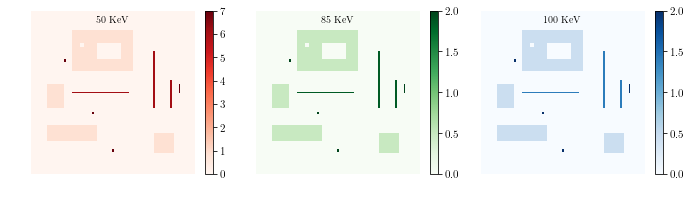

In [16]:
plt.close()
energies = ['E0', 'E1', 'E2']
vmax_aux = [vmax['E0'], vmax['E1'], vmax['E2']]

Nc = len(view_energies)
fig, axs = plt.subplots(1, Nc, figsize=(12, 3))
gs = gridspec.GridSpec(1, Nc)
gs.update(wspace=0.025, hspace=0.05)

name = '{}/gt_{}x{}_all_energies.npy'.format(folder_data, n, n)
gt_local = np.load(name)
gt = {}
for j, val in enumerate(view_energies):
    energy = energies[j]
    igt = np.reshape(gt_local[:, val], (n, n))
    gt[energy] = igt
    axs[j] = plt.subplot(gs[j])
    im = axs[j].imshow(igt, cmap=colormaps[energy], vmin=0.0, vmax=vmax_aux[j])
    axs[j].label_outer()
    axs[j].set_axis_off()
    # axs[j].set_title(r'{} KeV'.format(int(Em[val, 0])))
    axs[j].text(0.5, 0.93, r'{} KeV'.format(int(Em[val, 0])), size=10, ha='center', transform=axs[j].transAxes)
    fig.colorbar(im, ax=axs[j])

plt.savefig('{}/gt{}x{}_{}.pdf'.format(folder_images, n, n, dataset),
            format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.05)

## Side information

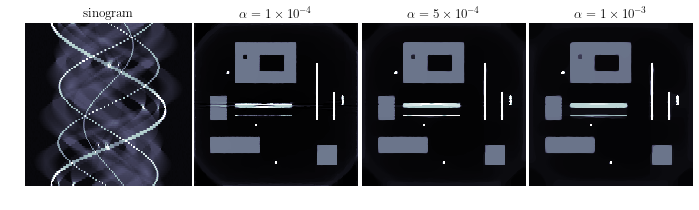

In [17]:
# SINFO AND RECONTRUCTIONS FOR DIFFERENT VALUES OF ALPHA
cmap = 'bone'
alphas = [1e-4, 5e-4, 1e-3]
labels = [r'$\alpha =1\times 10^{-4}$', r'$\alpha =5\times 10^{-4}$',
          r'$\alpha =1\times 10^{-3}$']

Nc = len(alphas) + 1
fig, axs = plt.subplots(1, Nc, figsize=(3*Nc, 3))
gs = gridspec.GridSpec(1, Nc)
gs.update(wspace=0, hspace=0)  # set the spacing between axes.

# sinogram
name = 'sinfo_sinogram_{}x{}'.format(sub_nangles, sub_ndet)
sinfo_dir = '{}/{}.npy'.format(folder_data, name)
sinfo_sino = np.load(sinfo_dir)
axs[0] = plt.subplot(gs[0])
im = axs[0].imshow(sinfo_sino, cmap=cmap, vmin=0, vmax=2.5, aspect=6)
axs[0].label_outer()
axs[0].set_axis_off()
axs[0].set_title('sinogram')

# TV sinfo alpha= 1e-3
alpha = alphas[0]
sinfo_name = 'TV_reconstruction_{}'.format(str(alpha).replace('.', '_'))
name = 'sinfo_{}_d{}x{}_m{}_a{}'.format(sinfo_name, sub_nangles,
                                        sub_ndet, sub_m, a_str)
sinfo_file = '{}/{}.npy'.format(folder_data, name)
sinfo_TV1 = np.load(sinfo_file)
axs[1] = plt.subplot(gs[1])
im = axs[1].imshow(sinfo_TV1, cmap=cmap, vmin=0, vmax=vmax_sinfo)
axs[1].label_outer()
axs[1].set_axis_off()
axs[1].set_title(labels[0])

alpha = alphas[1]
sinfo_name = 'TV_reconstruction_{}'.format(str(alpha).replace('.', '_'))
name = 'sinfo_{}_d{}x{}_m{}_a{}'.format(sinfo_name, sub_nangles,
                                        sub_ndet, sub_m, a_str)
sinfo_file = '{}/{}.npy'.format(folder_data, name)
sinfo_TV1 = np.load(sinfo_file)
axs[2] = plt.subplot(gs[2])
im = axs[2].imshow(sinfo_TV1, cmap=cmap, vmin=0, vmax=vmax_sinfo)
axs[2].label_outer()
axs[2].set_axis_off()
axs[2].set_title(labels[1])

# TV sinfo alpha= 2e-3
alpha = alphas[2]
sinfo_name = 'TV_reconstruction_{}'.format(str(alpha).replace('.', '_'))
name = 'sinfo_{}_d{}x{}_m{}_a{}'.format(sinfo_name, sub_nangles,
                                        sub_ndet, sub_m, a_str)
sinfo_file = '{}/{}.npy'.format(folder_data, name)
sinfo_TV1 = np.load(sinfo_file)
axs[3] = plt.subplot(gs[3])
im = axs[3].imshow(sinfo_TV1, cmap=cmap, vmin=0, vmax=vmax_sinfo)
axs[3].label_outer()
axs[3].set_axis_off()
axs[3].set_title(labels[2])

name = 'sinfo_reconstructions_d{}x{}'.format(sub_nangles, sub_ndet)
plt.savefig('{}/{}.pdf'.format(folder_images, name), format='pdf',
            dpi=1000, bbox_inches='tight', pad_inches=0.05)

# FBS reconstructions

In [18]:
alg = 'fbs'
tol = 1e-5
sinfo_type = '0_0001'
sinfo_label = r'1\times 10^{-4}'
eta_str = '1.0e_02'

## Figure 12: (All energies) reconstruction for three different values of $\alpha$

In [19]:
energies = ['E0', 'E1', 'E2']

regs = ['TV',  'dTV']

alphas = [1e-5, 5e-5, 1e-4]
alpha_titles = [r'1\times 10^{-5}', r'5\times 10^{-5}', r'1\times 10^{-4}']


In [20]:
final_image = {}
final_iter = {}
final_ssim = {}
final_value = {}
final_hpsi = {}
final_psnr = {}

for alpha_val in alphas:
    alpha = ('{0:.1e}'.format(alpha_val)).replace('-', '_')
    final_image[alpha] = {}
    final_iter[alpha] = {}
    final_ssim[alpha] = {}
    final_hpsi[alpha] = {}
    final_psnr[alpha] = {}
    final_value[alpha] = {}
    
    for energy in energies:
        cmap = colormaps[energy]

        final_image[alpha][energy] = {}
        final_iter[alpha][energy] = {}
        final_ssim[alpha][energy] = {}
        final_hpsi[alpha][energy] = {}
        final_psnr[alpha][energy] = {}
        final_value[alpha][energy] = {}
        groundtruth = gt[energy]

        iter_save_v, niter_v, image_v, out_v, nsub_v = {}, {}, {}, {}, {}

        for reg in regs:
            

            # # Distinguir entre TV y dTV con side info en el nombre
            if reg == 'TV':
                fn = '{}/{}_{}{}_alpha_{}_tol_{}'\
                     '_output.npy'.format(folder_npy, energy, alg, reg, alpha,
                                          str(tol).replace('-', '_'))
            elif reg == 'dTV':
                fn = '{}/{}_{}{}_alpha_{}_tol_{}_sinfo_{}_eta_{}'\
                     '_output.npy'.format(folder_npy, energy, alg, reg, alpha,
                                          str(tol).replace('-', '_'),
                                          sinfo_type, eta_str)

            (iter_save_v[fn], niter_v[fn], image_v[fn], out_v[fn], nsub_v[fn]) = np.load('{}'.format(fn))

            final_image[alpha][energy][reg] = image_v[fn]
            final_iter[alpha][energy][reg] = out_v[fn][-1]['iter']
            data = final_image[alpha][energy][reg]
            # final_ssim[alpha][energy][reg] = ssim(data, groundtruth)
            # final_hpsi[alpha][energy][reg] = hpsi(data, groundtruth)
            # final_psnr[alpha][energy][reg] = psnr(data, groundtruth)
            final_ssim[alpha][energy][reg] = out_v[fn][-1]['ssim_u']
            final_hpsi[alpha][energy][reg] = out_v[fn][-1]['hpsi_u']
            final_psnr[alpha][energy][reg] = out_v[fn][-1]['psnr_u']

            final_value[alpha][energy][reg] = out_v[fn][-1]['obj']

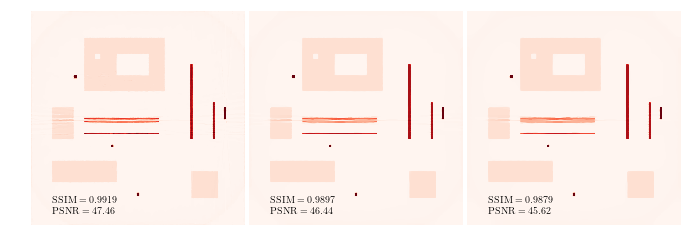

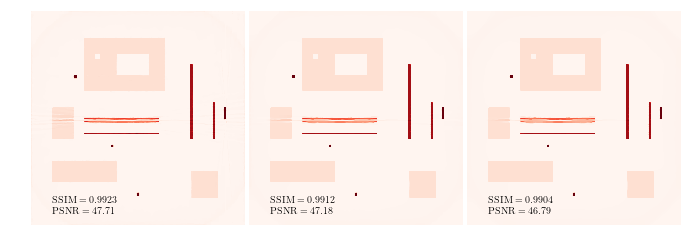

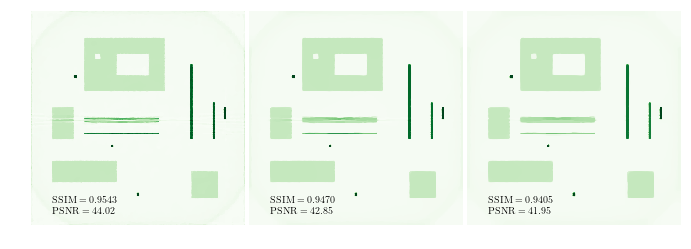

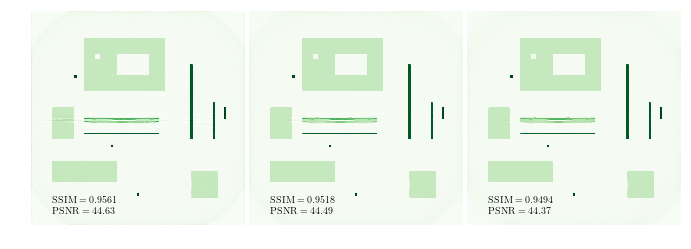

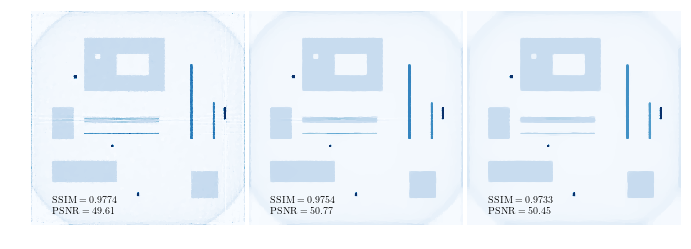

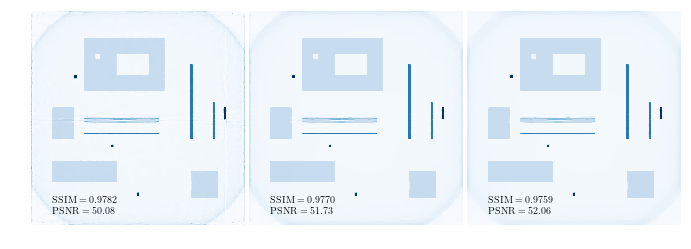

In [21]:
# SSIM and PSNR plots (THREE ALPHAS VS ENERGY FOR TV AND DTV)
# Block 3.2
for energy in energies:
    cmap = colormaps[energy]
    for reg in regs:
        Nc = len(alphas)
        fig, axs = plt.subplots(1, Nc, figsize=(3*Nc, Nc))
        gs = gridspec.GridSpec(1, Nc)
        gs.update(wspace=0, hspace=0)  # set the spacing between axes.

        for j, alpha_val in enumerate(alphas):
            
            alpha = ('{0:.1e}'.format(alpha_val)).replace('-', '_')

            selected_image = final_image[alpha][energy][reg]
            axs[j] = plt.subplot(gs[j])
            im = axs[j].imshow(selected_image, cmap=cmap, vmin=0,
                           vmax=vmax[energy])
            axs[j].label_outer()
            axs[j].set_axis_off()
            # if reg == 'TV':
            #     axs[j].set_title(r'$\alpha = {}$'.format(alpha_titles[j]))
            # axs[j].set_title(r'$\alpha = {}$'.format(alpha_val))
            ssim_val = final_ssim[alpha][energy][reg]
            psnr_val = final_psnr[alpha][energy][reg]
            hpsi_val = final_hpsi[alpha][energy][reg]
            axs[j].text(0.1, 0.1,
                        r'$\text{{SSIM}}={0:.4f}$'
                        .format(ssim_val), size=10, ha='left',
                        transform=axs[j].transAxes)
            axs[j].text(0.1, 0.05,
                        r'$\text{{PSNR}}={0:.2f}$'
                        .format(psnr_val), size=10, ha='left',
                        transform=axs[j].transAxes)
            plt.subplots_adjust(top=0.99, bottom=0, right=1.01, left=0,
                                hspace=0.1, wspace=0.1)

        name = '{}_{}_{}_alphas_eta_{}'.format(energy, alg, reg, eta_str)
        plt.savefig('{}/{}.pdf'.format(fig_folder, name), format='pdf',
                     dpi=1000, bbox_inches='tight', pad_inches=0.05)

# Figure 13: Summarized E1 and E2

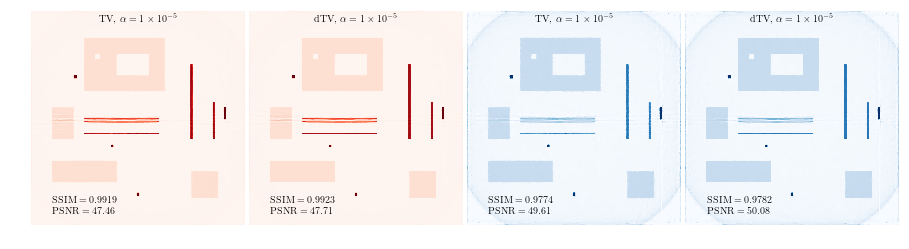

In [22]:
energies = ['E0', 'E2']
alg = 'fbs'

Nc = 4
Nf = 1

fig, axs = plt.subplots(Nf, Nc, figsize=(Nc*3, Nf*3))
gs = gridspec.GridSpec(Nf, Nc)
gs.update(wspace=0, hspace=0) 

for j, energy in enumerate(energies):
    for ki, reg in enumerate(regs):
        k = ki + 2*j
        best_alpha = optimal_alphas[energy][reg]
        cmap = colormaps[energy]

        alpha = ('{0:.1e}'.format(best_alpha)).replace('-', '_')
        selected_image = final_image[alpha][energy][reg]
        axs[k] = plt.subplot(gs[k])
        im = axs[k].imshow(selected_image, cmap=cmap, vmin=0, vmax=vmax[energy])
        axs[k].label_outer()
        axs[k].set_axis_off()
        ssim_val = final_ssim[alpha][energy][reg]
        psnr_val = final_psnr[alpha][energy][reg]
        hpsi_val = final_hpsi[alpha][energy][reg]
        axs[k].text(0.5, 0.95, r'{}, $\alpha={}$'.format(reg, optimal_labels[energy][reg]), size=10, ha='center', transform=axs[k].transAxes)
        axs[k].text(0.1, 0.1, r'$\text{{SSIM}}={0:.4f}$'.format(ssim_val), size=10, ha='left', transform=axs[k].transAxes)
        axs[k].text(0.1, 0.05, r'$\text{{PSNR}}={0:.2f}$'.format(psnr_val), size=10, ha='left', transform=axs[k].transAxes)
        plt.subplots_adjust(top=0.99, bottom=0, right=1.01, left=0, hspace=0.1, wspace=0.1)

name = '{}_{}_{}_alphas_eta_{}'.format(alg, energies[0], energies[1], eta_str)
plt.savefig('{}/{}.pdf'.format(fig_folder, name), format='pdf',
             dpi=1000, bbox_inches='tight', pad_inches=0.05)

# BREGMAN RESULTS

In [23]:
alg = 'bregman'
alpha_val = 5e-2
alpha = '{0:.1e}'.format(alpha_val).replace('-', '_')
alpha_bregman = alpha
sinfo_type = '0_0001'

## Iterations vs SSIM values

In [24]:
# %% Block 4.1
# Choose a energy level for plot results with both regularizers
regs = ['TV', 'dTV']
energies = ['E0', 'E1', 'E2']
file_names = {}
for energy in energies: 
    file_names[energy] = {}
    
    iter_save_v, niter_v, image_v, out_v, nsub_v = {}, {}, {}, {}, {}
    
    for reg in regs:
        if reg == 'TV':
            fn = '{}/{}_{}{}_alpha_{}_tol_{}'\
                 '_output.npy'.format(folder_npy, energy, alg, reg, alpha,
                                      str(tol).replace('-', '_'))
        elif reg == 'dTV':
            fn = '{}/{}_{}{}_alpha_{}_tol_{}_sinfo_{}_eta_{}'\
                 '_output.npy'.format(folder_npy, energy, alg, reg, alpha,
                                      str(tol).replace('-', '_'),
                                      sinfo_type, eta_str)
        file_names[energy][reg] = fn
        

In [25]:
# Read files
out_resorted_im = {}
out_resorted_sim = {}
meas = 'image'
sim_measures = ['ssim_u', 'psnr_u']
    
for energy in energies:
    igt = gt[energy]
    for reg in regs:
        fn = file_names[energy][reg]
        (iter_save_v[fn], niter_v[fn], image_v[fn], out_v[fn], nsub_v[fn]) = np.load('{}'.format(fn))
        out_fn = out_v[fn]
        out_resorted_im[fn] = {}
        K = len(iter_save_v[fn])
        for k in range(K):
            out_resorted_im[fn][k] = out_v[fn][k]['image']

        out_resorted_sim[fn] = {}

        for meas in sim_measures:
            print(meas + ' ' + energy + ' ' + reg)
            out_resorted_sim[fn][meas] = 0 * np.ones(K)
            for k in range(K):
                if meas == 'ssim_u':
                    out_resorted_sim[fn][meas][k] = ssim(out_fn[k]['image'], igt)
                if meas == 'psnr_u':
                    out_resorted_sim[fn][meas][k] = psnr(out_fn[k]['image'], igt)


ssim_u E0 TV
psnr_u E0 TV
ssim_u E0 dTV
psnr_u E0 dTV
ssim_u E1 TV
psnr_u E1 TV
ssim_u E1 dTV
psnr_u E1 dTV
ssim_u E2 TV
psnr_u E2 TV
ssim_u E2 dTV
psnr_u E2 dTV


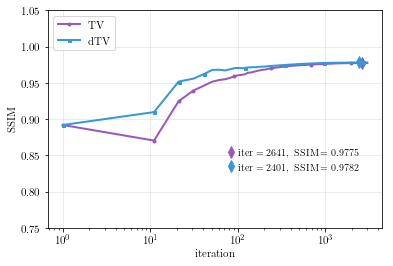

In [26]:
# %% Plot SSIM and PSNR values along iterations (curves)
# Block 4.3
step = 10
# Vectorized SSIM and PSNR
vect_sim = {}

energies = ['E0', 'E1', 'E2']
regs = ['TV', 'dTV']

for energy in energies:
    vect_sim[energy] = {}
    for reg in regs:
        fn = file_names[energy][reg]
        vect_sim[energy][reg] = {}
        label = [r'{}'.format(reg) for reg in regs]
        meas_names = [r'SSIM $[\ \%\ ]$', 'PSNR [dB]']

        for meas in sim_measures:
            vect_sim[energy][reg][meas] =  0 * np.ones(K)
            
            for k in range(K):
                vect_sim[energy][reg][meas][k] = out_resorted_sim[fn][meas][k]

max_SSIM = {}
for energy in energies:
    max_SSIM[energy] = {}
    # Plot
    x = np.arange(1, step*K + 1, step)
    k = 0
    
    plt.clf()
    plt.close()
    
    for i, reg in enumerate(regs):
        
        y = vect_sim[energy][reg]['ssim_u']
        ind_max = np.argmax(y)
        max_x = x[ind_max] + 1
        max_y = y[ind_max]
    
        plt.semilogx(x, y, color=color_set[k], linestyle=lstyle,
                     linewidth=2, marker=marker[k], markersize=3,
                     label=label[k], markevery=.1)
        
        max_SSIM[energy][reg] = max_x - 2
        plt.plot(max_x, max_y, 'p', color=color_set[k], markersize=8, marker='d')

        plt.plot(84, 0.855-i*0.02, 'p', color=color_set[k], markersize=8, marker='d')
        plt.text(100, 0.85-i*0.02, r'$\text{{iter}}={:4g},\ \text{{SSIM}}={:.4g}$'.format(max_x-1, max_y),
                 fontsize=10)
        # plt.xticks([1, 10, 50, 100, 300, 500, 1000],
        #            [1, 10, 50, 100, 300, 500, 1000])
        plt.grid(True, alpha=0.3)
        plt.gca().set_xlabel('iteration')
        plt.gca().set_ylabel(r'SSIM')
        plt.legend(frameon=True, loc=2, ncol=1)
        k += 1

    axes = plt.gca()
    axes.set_ylim([0.75, 1.05])

    name = '{}_{}_iter_vs_SSIM_eta_{}_tol_{}_alpha_'\
           '{}'.format(energy, alg, eta_str, tol, alpha_bregman)
    plt.savefig('{}/{}.pdf'.format(fig_folder, name), format='pdf',
                dpi=1000, bbox_inches='tight', pad_inches=0)

## Figure 14: Bregman iterations for TV and dTV (all energies)

{'E2': {'TV': 2640, 'dTV': 2400}, 'E0': {'TV': 3000, 'dTV': 2980}, 'E1': {'TV': 2980, 'dTV': 2790}}


<Figure size 432x288 with 0 Axes>

<Figure size 648x216 with 0 Axes>

<Figure size 648x216 with 0 Axes>

<Figure size 648x216 with 0 Axes>

<Figure size 648x216 with 0 Axes>

<Figure size 648x216 with 0 Axes>

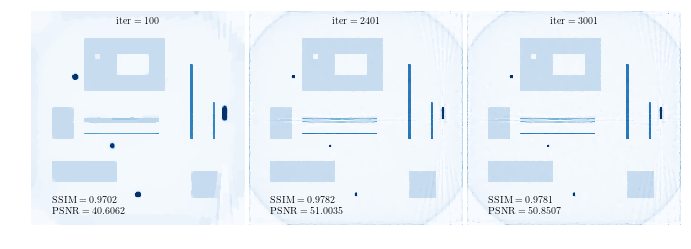

In [27]:
# %% SSIM and PSNR with IMAGES for given iterations y given reg (3 images)
# Block 4.4
print(max_SSIM)
bregman_images = {}

for energy in energies:
    cmap = colormaps[energy]
    bregman_images[energy] = {}
    for reg in regs:
        
        fn = file_names[energy][reg]
        iters = [99, max_SSIM[energy][reg], step*(K-1)]
        plt.clf()
        Nc = len(iters)
        fig, axs = plt.subplots(1, Nc, figsize=(3*Nc, Nc))
        gs = gridspec.GridSpec(1, Nc)
        gs.update(wspace=0, hspace=0)  # set the spacing between axes.

        if reg == 'TV':
            fn = '{}/{}_{}{}_alpha_{}_tol_{}'\
                 '_output.npy'.format(folder_npy, energy, alg, reg, alpha,
                                      str(tol).replace('-', '_'))
        elif reg == 'dTV':
            fn = '{}/{}_{}{}_alpha_{}_tol_{}_sinfo_{}_eta_{}'\
                 '_output.npy'.format(folder_npy, energy, alg, reg, alpha,
                                      str(tol).replace('-', '_'),
                                      sinfo_type, eta_str)

        for j, iter_val in enumerate(iters):
            sub_val = int(iter_val/step)
            selected_image = out_resorted_im[fn][sub_val]
            axs[j] = plt.subplot(gs[j])
            im = axs[j].imshow(selected_image, cmap=cmap, vmin=0,
                               vmax=vmax[energy])
            axs[j].label_outer()
            axs[j].set_axis_off()
            ssim_val = out_resorted_sim[fn]['ssim_u'][sub_val]
            psnr_val = out_resorted_sim[fn]['psnr_u'][sub_val]

            axs[j].text(0.5, 0.94, r'$\text{{iter}} = {}$'.format(iter_val + 1), size=10, ha='center',
                        transform=axs[j].transAxes)
            axs[j].text(0.1, 0.1, r'$\text{{SSIM}}={0:.4f}$'.format(ssim_val), size=10, ha='left',
                        transform=axs[j].transAxes)
            axs[j].text(0.1, 0.05, r'$\text{{PSNR}}={0:.4f}$'.format(psnr_val), size=10, ha='left',
                        transform=axs[j].transAxes)

            plt.subplots_adjust(top=0.99, bottom=0, right=1.01, left=0,
                                hspace=0.1, wspace=0.1)
            if j == 1:
                bregman_images[energy][reg] = selected_image

        name = '{}_{}{}_images_iter_eta_{}_alpha_'\
               '{}'.format(energy, alg, reg, eta_str, alpha)
        plt.savefig('{}/{}.pdf'.format(fig_folder, name), format='pdf',
                    dpi=1000, bbox_inches='tight', pad_inches=0)

## FBS vs Bregman with difference image

<Figure size 432x288 with 0 Axes>

<Figure size 878.4x432 with 0 Axes>

<Figure size 878.4x432 with 0 Axes>

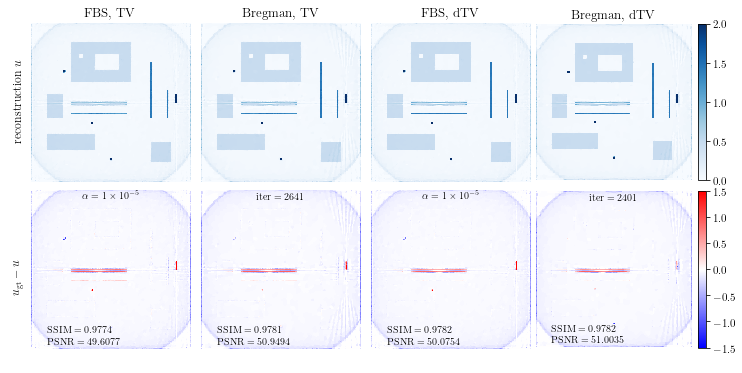

In [30]:
# %% BREGMAN VS FBS
a1, a2 = (720, 552)
step = 10
algorithms = ['FBS', 'Bregman']

cmap_diff = 'bwr'
vmax_diff = {'E0': 3, 'E1': 3, 'E2': 1.5}

for energy in energies:
    
    ref_energy = gt[energy]
    cmap = colormaps[energy]
    
    plt.clf()
    Nc = 4
    Nf = 2

    fig, axs = plt.subplots(Nf, Nc, figsize=(Nc*3.05, Nf*3))
    gs = gridspec.GridSpec(Nf, Nc)
    gs.update(wspace=0, hspace=0.05)  # set the spacing between axes.

    for i, reg in enumerate(regs):
        
        fbs_alpha = optimal_alphas[energy][reg]
        bregman_iter = max_SSIM[energy][reg]
        
        for ll, alg in enumerate(algorithms):
            j = 0
            k = 0 + ll + 2*i
            
            if alg == 'FBS':
                alpha_aux = ('{0:.1e}'.format(fbs_alpha)).replace('-', '_')
                selected_image = final_image[alpha_aux][energy][reg]
                axs[j, k].text(0.5, 0.94, r'$\text{{iter}} = {}$'.format(optimal_labels[energy][reg]), size=10, ha='center',
                               transform=axs[j, k].transAxes)
                ssim_val = final_ssim[alpha_aux][energy][reg]
                psnr_val = final_psnr[alpha_aux][energy][reg]
                
            elif alg == 'Bregman':
                selected_image = bregman_images[energy][reg]
                axs[j, k].text(0.5, 0.94, r'$\text{{iter}} = {}$'.format(bregman_iter + 1), size=10, ha='center',
                               transform=axs[j, k].transAxes)
                
                sub_val = int(bregman_iter/step)
                ssim_val = out_resorted_sim[fn]['ssim_u'][sub_val]
                psnr_val = out_resorted_sim[fn]['psnr_u'][sub_val]

                   
            axs[j, k] = plt.subplot(gs[j, k])
            im = axs[j, k].imshow(selected_image, cmap=cmap, vmax=vmax[energy], vmin=0)
            axs[j, k].label_outer()
            axs[j, k].set_axis_off()
            axs[j, k].set_title('{}, {}'.format(alg, reg))
            if j == 0:
                if k==3:
                    plt.colorbar(im, ax=axs[j, k], pad=0.04, fraction=0.046)
                    
                if k==0:
                    axs[j, k].text(-0.08, 0.7, r'reconstruction $u$', size=12, ha='center', rotation=90,
                                   transform=axs[j, k].transAxes) 
            
            j = 1
            k = 0 + ll + 2*i
            diff = ref_energy - selected_image
            axs[j, k] = plt.subplot(gs[j, k])
            im = axs[j, k].imshow(diff, cmap=cmap_diff, vmin=-vmax_diff[energy], vmax=vmax_diff[energy])
            axs[j, k].label_outer()
            axs[j, k].set_axis_off()
            if alg == 'FBS':
                axs[j, k].text(0.5, 0.95, r'$\alpha={}$'.format(optimal_labels[energy][reg]), size=10, ha='center', 
                               transform=axs[j, k].transAxes)
            elif alg == 'Bregman':
                axs[j, k].text(0.5, 0.94, r'$\text{{iter}} = {}$'.format(bregman_iter + 1), size=10, ha='center',
                               transform=axs[j, k].transAxes)

            axs[j, k].text(0.1, 0.1, r'$\text{{SSIM}}={0:.4f}$'.format(ssim_val), size=10, ha='left',
                           transform=axs[j, k].transAxes)
            axs[j, k].text(0.1, 0.03, r'$\text{{PSNR}}={0:.4f}$'.format(psnr_val), size=10, ha='left',
                           transform=axs[j, k].transAxes)
            if j == 1:
                if k==3:
                    plt.colorbar(im, ax=axs[j, k], pad=0.04, fraction=0.046)
            
                if k==0:
                    axs[j, k].text(-0.08, 0.5, r'$u_{\text{gt}} - u$', size=12, ha='center', rotation=90,
                                   transform=axs[j, k].transAxes) 
    
    name = '{}_fbs_vs_bregman_TV_dTV_differences_d{}x{}_eta{}_tol_{}_alpha_'\
           '{}'.format(energy, sub_nangles, sub_ndet, eta_str, tol, alpha)
    plt.savefig('{}/{}.pdf'.format(fig_folder, name), format='pdf',
                dpi=1000, bbox_inches='tight', pad_inches=0)

## Figure 16: Compare the results of two side information

In [32]:
# Load values for new side information
# Read files

# %% Block 4.1
# Choose a energy level for plot results with both regularizers

alg = 'bregman'
alpha_val = 1e-1
alpha = '{0:.1e}'.format(alpha_val).replace('-', '_')
sinfo_type = '0_0005' #second option
tol = 1e-5

regs = ['dTV']
energies = ['E1']
file_names_new = {}
for energy in energies: 
    file_names_new[energy] = {}
    
    iter_save_v, niter_v, image_v, out_v, nsub_v = {}, {}, {}, {}, {}
    
    for reg in regs:
        if reg == 'TV':
            fn = '{}/{}_{}{}_alpha_{}_tol_{}'\
                 '_output.npy'.format(folder_npy, energy, alg, reg, alpha,
                                      str(tol).replace('-', '_'))
        elif reg == 'dTV':
            fn = '{}/{}_{}{}_alpha_{}_tol_{}_sinfo_{}_eta_{}'\
                 '_output.npy'.format(folder_npy, energy, alg, reg, alpha,
                                      str(tol).replace('-', '_'),
                                      sinfo_type, eta_str)
        file_names_new[energy][reg] = fn
        
out_resorted_im_new = {}
out_resorted_sim_new = {}
meas = 'image'
sim_measures = ['ssim_u', 'psnr_u']
    
for energy in energies:
    igt = gt[energy]
    for reg in regs:
        fn = file_names_new[energy][reg]
        (iter_save_v[fn], niter_v[fn], image_v[fn], out_v[fn], nsub_v[fn]) = np.load('{}'.format(fn))
        out_fn = out_v[fn]
        out_resorted_im_new[fn] = {}
        K = len(iter_save_v[fn])
        for k in range(K):
            out_resorted_im_new[fn][k] = out_v[fn][k]['image']

        out_resorted_sim_new[fn] = {}
        for meas in sim_measures:
            print(meas + ' ' + energy + ' ' + reg)
            out_resorted_sim_new[fn][meas] = 0 * np.ones(K)
            for k in range(K):
                if meas == 'ssim_u':
                    out_resorted_sim_new[fn][meas][k] = ssim(out_fn[k]['image'], igt)
                if meas == 'psnr_u':
                    out_resorted_sim_new[fn][meas][k] = psnr(out_fn[k]['image'], igt)

                    
                    
# FBS   
alg = 'fbs'
tol = 1e-5
sinfo_type = '0_0005'
sinfo_label = r'1\times 10^{-4}'
eta_str = '1.0e_02'
alpha_val = 5e-5

final_image_new = {}
final_iter_new = {}
final_ssim_new = {}
final_value_new = {}
final_hpsi_new = {}
final_psnr_new = {}

alpha = ('{0:.1e}'.format(alpha_val)).replace('-', '_')
final_image_new[alpha] = {}
final_iter_new[alpha] = {}
final_ssim_new[alpha] = {}
final_hpsi_new[alpha] = {}
final_psnr_new[alpha] = {}
final_value_new[alpha] = {}

for energy in energies:
    cmap = colormaps[energy]

    final_image_new[alpha][energy] = {}
    final_iter_new[alpha][energy] = {}
    final_ssim_new[alpha][energy] = {}
    final_hpsi_new[alpha][energy] = {}
    final_psnr_new[alpha][energy] = {}
    final_value_new[alpha][energy] = {}
    groundtruth = gt[energy]

    iter_save_v, niter_v, image_v, out_v, nsub_v = {}, {}, {}, {}, {}

    for reg in regs:


        # # Distinguir entre TV y dTV con side info en el nombre
        if reg == 'TV':
            fn = '{}/{}_{}{}_alpha_{}_tol_{}'\
                 '_output.npy'.format(folder_npy, energy, alg, reg, alpha,
                                      str(tol).replace('-', '_'))
        elif reg == 'dTV':
            fn = '{}/{}_{}{}_alpha_{}_tol_{}_sinfo_{}_eta_{}'\
                 '_output.npy'.format(folder_npy, energy, alg, reg, alpha,
                                      str(tol).replace('-', '_'),
                                      sinfo_type, eta_str)

        (iter_save_v[fn], niter_v[fn], image_v[fn], out_v[fn], nsub_v[fn]) = np.load('{}'.format(fn))

        final_image_new[alpha][energy][reg] = image_v[fn]
        final_iter_new[alpha][energy][reg] = out_v[fn][-1]['iter']
        data = final_image_new[alpha][energy][reg]
        final_ssim_new[alpha][energy][reg] = ssim(data, groundtruth)
        final_hpsi_new[alpha][energy][reg] = hpsi(data, groundtruth)
        final_psnr_new[alpha][energy][reg] = psnr(data, groundtruth)
        # final_ssim[alpha][energy][reg] = out_v[fn][-1]['ssim_u']
        # final_hpsi[alpha][energy][reg] = out_v[fn][-1]['hpsi_u']
        # final_psnr[alpha][energy][reg] = out_v[fn][-1]['psnr_u']

        final_value_new[alpha][energy][reg] = out_v[fn][-1]['obj']                 

ssim_u E1 dTV
psnr_u E1 dTV


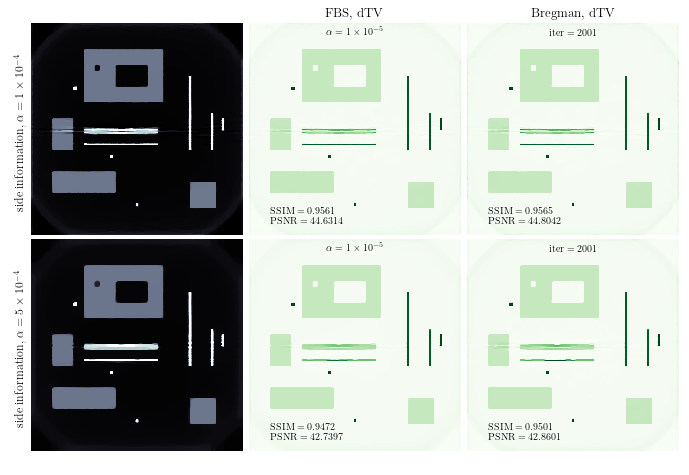

In [33]:
side_alphas = ['0_0001', '0_0005']
side_labels = [r'$\alpha=1\times 10^{-4}$', r'$\alpha=5\times 10^{-4}$']

optimal_alphas_new = {'E1': {'dTV': 5e-5}}

reg = 'dTV'

energy = 'E1'
cmap = colormaps[energy]

Nc = 3
Nr = len(side_alphas)

fig, axs = plt.subplots(Nr, Nc, figsize=(3*Nc, 3*Nr))
gs = gridspec.GridSpec(Nr, Nc)
gs.update(wspace=0, hspace=0.02)  # set the spacing between axes.
    
j = 0
k = 0
side_alpha = side_alphas[0]
sinfo_name = 'TV_reconstruction_{}'.format(str(side_alpha).replace('.', '_'))
name = 'sinfo_{}_d{}x{}_m{}_a{}'.format(sinfo_name, sub_nangles, sub_ndet, sub_m, a_str)
sinfo_file = '{}/{}.npy'.format(folder_data, name)

sinfo_i = np.load(sinfo_file)

axs[j, k] = plt.subplot(gs[j, k])
im = axs[j, k].imshow(sinfo_i, cmap='bone', vmin=0, vmax=vmax_sinfo)
axs[j, k].label_outer()
axs[j, k].set_axis_off()
# axs[j, k].set_title(r'side info, {}'.format(side_labels[0]))
axs[j, k].text(-0.05, 0.8, r'side information, {}'.format(side_labels[0]), size=12, ha='center', rotation=90,
               transform=axs[j, k].transAxes)


# Figure (0,1) and (1,1)
# FBS sinfo alpha= 1e-4, alpha_opt = 5x10^{-5}
j = 0
k = 1
alg = 'fbs'

fbs_alpha = optimal_alphas[energy][reg]
fbs_alpha_label = optimal_labels[energy][reg]
alpha_aux = ('{0:.1e}'.format(fbs_alpha)).replace('-', '_')
fbs_image = final_image[alpha_aux][energy][reg]
ssim_val = final_ssim[alpha_aux][energy][reg]
psnr_val = final_psnr[alpha_aux][energy][reg]

axs[j, k] = plt.subplot(gs[j, k])
im = axs[j, k].imshow(fbs_image, cmap=cmap, vmin=0, vmax=vmax[energy])
axs[j, k].label_outer()
axs[j, k].set_axis_off()
axs[j, k].set_title(r'FBS, {}'.format(reg))

axs[j, k].text(0.5, 0.95, r'$\alpha={}$'.format(fbs_alpha_label), size=10, ha='center', transform=axs[j, k].transAxes)
axs[j, k].text(0.1, 0.1, r'$\text{{SSIM}}={0:.4f}$'.format(ssim_val), size=10, ha='left', transform=axs[j, k].transAxes)
axs[j, k].text(0.1, 0.05, r'$\text{{PSNR}}={0:.4f}$'.format(psnr_val), size=10, ha='left', transform=axs[j, k].transAxes)
plt.subplots_adjust(top=0.99, bottom=0, right=1.01, left=0, hspace=0.1, wspace=0.1)


j = 0
k = 2
alg = 'bregman'
iter_val = max_SSIM[energy][reg]
iter_val = 2000
bregman_iter = np.int(iter_val/step)
bregman_image = bregman_images[energy][reg]
fn = file_names[energy][reg]
ssim_val = out_resorted_sim[fn]['ssim_u'][bregman_iter]
psnr_val = out_resorted_sim[fn]['psnr_u'][bregman_iter]

axs[j, k] = plt.subplot(gs[j, k])
im = axs[j, k].imshow(bregman_image, cmap=cmap, vmin=0, vmax=vmax[energy])
axs[j, k].label_outer()
axs[j, k].set_axis_off()
axs[j, k].set_title(r'Bregman, {}'.format(reg))

axs[j, k].text(0.5, 0.94, r'$\text{{iter}} = {}$'.format(iter_val + 1), size=10, ha='center',
            transform=axs[j, k].transAxes)
axs[j, k].text(0.1, 0.1, r'$\text{{SSIM}}={0:.4f}$'.format(ssim_val), size=10, ha='left',
            transform=axs[j, k].transAxes)
axs[j, k].text(0.1, 0.05, r'$\text{{PSNR}}={0:.4f}$'.format(psnr_val), size=10, ha='left',
            transform=axs[j, k].transAxes)
    
j = 1
k = 0
side_alpha = side_alphas[1]
sinfo_name = 'TV_reconstruction_{}'.format(str(side_alpha).replace('.', '_'))
name = 'sinfo_{}_d{}x{}_m{}_a{}'.format(sinfo_name, sub_nangles, sub_ndet, sub_m, a_str)
sinfo_file = '{}/{}.npy'.format(folder_data, name)

sinfo_i = np.load(sinfo_file)

axs[j, k] = plt.subplot(gs[j, k])
im = axs[j, k].imshow(sinfo_i, cmap='bone', vmin=0, vmax=vmax_sinfo)
axs[j, k].label_outer()
axs[j, k].set_axis_off()
# axs[j, k].set_title(r'side info, {}'.format(side_labels[1]))
axs[j, k].text(-0.05, 0.8, r'side information, {}'.format(side_labels[1]), size=12, ha='center', rotation=90,
               transform=axs[j, k].transAxes) 

j = 1
k = 1
alg = 'fbs'

fbs_alpha = optimal_alphas_new[energy][reg]
alpha_aux = ('{0:.1e}'.format(fbs_alpha)).replace('-', '_')
fbs_image = final_image_new[alpha_aux][energy][reg]
ssim_val = final_ssim_new[alpha_aux][energy][reg]
psnr_val = final_psnr_new[alpha_aux][energy][reg]

axs[j, k] = plt.subplot(gs[j, k])
im = axs[j, k].imshow(fbs_image, cmap=cmap, vmin=0, vmax=vmax[energy])
axs[j, k].label_outer()
axs[j, k].set_axis_off()
axs[j, k].text(0.5, 0.95, r'$\alpha={}$'.format(fbs_alpha_label), size=10, ha='center', transform=axs[j, k].transAxes)
axs[j, k].text(0.1, 0.1, r'$\text{{SSIM}}={0:.4f}$'.format(ssim_val), size=10, ha='left', transform=axs[j, k].transAxes)
axs[j, k].text(0.1, 0.05, r'$\text{{PSNR}}={0:.4f}$'.format(psnr_val), size=10, ha='left', transform=axs[j, k].transAxes)
plt.subplots_adjust(top=0.99, bottom=0, right=1.01, left=0, hspace=0.1, wspace=0.1)


j = 1
k = 2
alg = 'bregman'
iter_val = 2000 # 2775
bregman_iter = np.int(iter_val/step)
fn = file_names_new[energy][reg]
bregman_image = out_resorted_im_new[fn][bregman_iter]
ssim_val = out_resorted_sim_new[fn]['ssim_u'][bregman_iter]
psnr_val = out_resorted_sim_new[fn]['psnr_u'][bregman_iter]

axs[j, k] = plt.subplot(gs[j, k])
im = axs[j, k].imshow(bregman_image, cmap=cmap, vmin=0, vmax=vmax[energy])
axs[j, k].label_outer()
axs[j, k].set_axis_off()

axs[j, k].text(0.5, 0.94, r'$\text{{iter}} = {}$'.format(iter_val + 1), size=10, ha='center',
            transform=axs[j, k].transAxes)
axs[j, k].text(0.1, 0.1, r'$\text{{SSIM}}={0:.4f}$'.format(ssim_val), size=10, ha='left',
            transform=axs[j, k].transAxes)
axs[j, k].text(0.1, 0.05, r'$\text{{PSNR}}={0:.4f}$'.format(psnr_val), size=10, ha='left',
            transform=axs[j, k].transAxes)

name = '{}_compare_side_info_d{}x{}_eta{}_tol_{}_alpha_'\
       '{}'.format(energy, sub_nangles, sub_ndet, eta_str, tol, alpha)
plt.savefig('{}/{}.pdf'.format(fig_folder, name), format='pdf',
            dpi=1000, bbox_inches='tight', pad_inches=0)


# Figure 15: SSIM figures for all algorithms

In [35]:
# We plot the ssim value along iterations for fbs and bregman algorithm
energy = 'E1'
regs = ['TV', 'dTV']
algs = ['fbs', 'bregman']
sinfo_type = '0_0001'

bmap = brewer2mpl.get_map('Paired', 'Qualitative', 5)
colors = bmap.mpl_colors

alpha_local = {'fbs': '1.0e_05', 'bregman': '5.0e_02'}

for alg in algs:
    alpha_1 = alpha_local[alg]
    print(alpha_1)
    for reg in regs:
        
        if reg == 'TV':
            fn = '{}/{}_{}{}_alpha_{}_tol_{}'\
                 '_output.npy'.format(folder_npy, energy, alg, reg, alpha_1,
                                  str(tol).replace('-', '_'))

            if alg == 'fbs':
                (iter_save_fbsTV, niter_fbsTV, image_fbsTV, out_fbsTV, nsub_fbsTV) = np.load('{}'.format(fn))
            else: 
                (iter_save_bregmanTV, niter_bregmanTV, image_bregmanTV, out_bregmanTV, nsub_bregmanTV) = np.load('{}'.format(fn))

        elif reg == 'dTV':
            fn = '{}/{}_{}{}_alpha_{}_tol_{}_sinfo_{}_eta_{}'\
                 '_output.npy'.format(folder_npy, energy, alg, reg, alpha_1,
                                  str(tol).replace('-', '_'),
                                  sinfo_type, eta_str)
            if alg == 'fbs':
                (iter_save_fbsdTV, niter_fbsdTV, image_fbsdTV, out_fbsdTV, nsub_fbsdTV) = np.load('{}'.format(fn))
            else: 
                (iter_save_bregmandTV, niter_bregmandTV, image_bregmandTV, out_bregmandTV, nsub_bregmandTV) = np.load('{}'.format(fn))


1.0e_05
5.0e_02


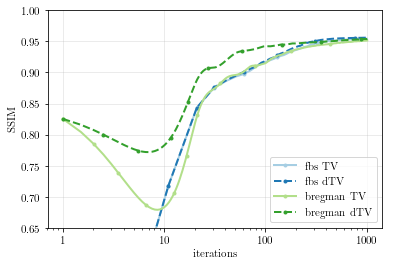

In [36]:
step = 10
ssim_fbsTV = []
ssim_fbsdTV = []
ssim_bregmanTV = []
ssim_bregmandTV = []

from matplotlib.ticker import ScalarFormatter

    
label = [r'fbs TV', r'fbs dTV', r'bregman TV', r'bregman dTV']

for i in range(len(out_fbsTV)):
    ssim_fbsTV.append(out_fbsTV[i]['ssim_u'])
for i in range(len(out_fbsdTV)):
    ssim_fbsdTV.append(out_fbsdTV[i]['ssim_u'])
for i in range(len(out_bregmanTV)):
    ssim_bregmanTV.append(out_bregmanTV[i]['ssim_u'])
for i in range(len(out_bregmandTV)):
    ssim_bregmandTV.append(out_bregmandTV[i]['ssim_u'])

# fbs TV
x = np.arange(1, len(out_fbsTV)*step+1, step) #[1:]
y = ssim_fbsTV #[1:]

plt.semilogx(x, y, color=colors[0], linestyle=lstyle,
             linewidth=2, markersize=6, marker='.',
             markevery=.1, label=label[0])

# fbs dTV
x = np.arange(1, len(out_fbsdTV)*step+1, step) #[1:]
y = ssim_fbsdTV #[1:]

plt.semilogx(x, y, color=colors[1], linestyle='dashed',
             linewidth=2, markersize=6, marker='.',
             markevery=.1, label=label[1])


# Bregman TV
x = np.arange(1, len(out_bregmanTV)*step+1, step) #[1:]
y = ssim_bregmanTV #[1:]

xnew = np.linspace(1, len(out_fbsdTV)*step+1, num=2000, endpoint=True)
f2 = interp1d(x, y, kind='cubic')
        

plt.semilogx(xnew, f2(xnew), color=colors[2], linestyle=lstyle,
             linewidth=2, markersize=6, marker='.',
             markevery=.1, label=label[2])

# Bregman dTV
x = np.arange(1, len(out_bregmanTV)*step+1, step) #[1:]
y = ssim_bregmandTV #[1:]

xnew = np.linspace(1, len(out_fbsdTV)*step+1, num=2000, endpoint=True)
f2 = interp1d(x, y, kind='cubic')

plt.semilogx(xnew, f2(xnew), color=colors[3], linestyle='dashed',
             linewidth=2, markersize=6, marker='.',
             markevery=.1, label=label[3])

axes = plt.gca()
axes.set_ylim([0.65, 1])
plt.grid(True, alpha=0.3)
plt.gca().set_xlabel('iterations')
plt.gca().set_ylabel(r'SSIM')
plt.legend(frameon=True, loc=4, ncol=1)
for axis in [axes.xaxis, axes.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

axes.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

name = '{}_compare_ssim_vs_iter'.format(energy)
plt.savefig('{}/{}.pdf'.format(fig_folder, name), format='pdf',
            dpi=1000, bbox_inches='tight', pad_inches=0)